In [77]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [78]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [79]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

movies = pd.read_csv("C:\\Users\\HP\\Downloads\\Movie+Assignment+Data.csv")
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [80]:
# Check the number of rows and columns in the dataframe

rows = movies.shape[0]
columns = movies.shape[1]
print("Rows:", rows,"\n")
print("Columns:", columns)

Rows: 100 

Columns: 62


In [81]:
# Check the column-wise info of the dataframe

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [82]:
# Check the summary for the numeric columns 

movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


##### Check the null values present in dataframe


In [83]:
#any() - if it returned True, then there is atleast one single null value
movies.isnull().values.any()

True

In [84]:
# Check the null values present in dataframe
movies.isnull().sum()

Title             0
title_year        0
budget            0
Gross             0
actor_1_name      0
                 ..
Votes1000         0
VotesUS           0
VotesnUS          0
content_rating    0
Country           0
Length: 62, dtype: int64

In [85]:
# Check null values pesent in particular columns
movies[["actor_2_facebook_likes","actor_3_facebook_likes","genre_2","genre_3","MetaCritic"]].isnull().sum()

actor_2_facebook_likes     1
actor_3_facebook_likes     2
genre_2                    3
genre_3                   26
MetaCritic                 5
dtype: int64

**NOTE**: Each null value present in the above particular columns cannot be dropped as each column has specific impact on the further analysis.

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [86]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

movies.Gross = movies.Gross/1000000
movies.budget = movies.budget/1000000

-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [87]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

movies["profit"] = movies.Gross - movies.budget

In [88]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

movies.sort_values(["profit"], ascending=[False])

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


In [89]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

top10 = movies.sort_values(["profit"], ascending=[False]).iloc[0:10,0:]
top10

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367


In [90]:
import scipy.stats as ss

<Figure size 720x720 with 0 Axes>

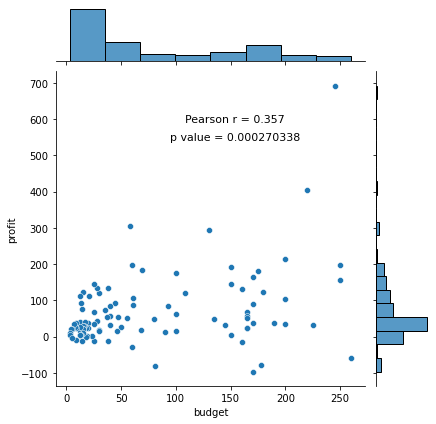

In [91]:
#Plot profit vs budget

str1 = 'Pearson r = {}'.format(ss.pearsonr(movies.budget,movies.profit)[0].round(3))
str2 = 'p value = {}'.format(ss.pearsonr(movies.budget,movies.profit)[1].round(9))   
plt.figure(figsize =[10,10])
sns.jointplot(movies.budget, movies.profit)
plt.text(-100,600, str1,horizontalalignment='center',verticalalignment='center',fontsize = 11 )
plt.text(-100,550,str2,horizontalalignment='center',verticalalignment='center',fontsize = 11)
plt.show()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [92]:
#Find the movies with negative profit
neg_profit = movies[movies.profit<0]
neg_profit

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
22,Hugo,2011,170.0,73.820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.4,7.5,7.5,7.6,7.4,7.7,7.5,PG,USA,-96.179906
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623


**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

**`Checkpoint 1:`** **YES**, the movie `Tangled` is available in the dataset of **`neg_profit`**

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [93]:
# Change the scale of MetaCritic

movies.MetaCritic = (movies.MetaCritic/100)*10
movies.MetaCritic

0     9.3
1     7.8
2     6.9
3     8.1
4     9.6
     ... 
95    8.8
96    9.4
97    8.1
98    6.5
99    6.5
Name: MetaCritic, Length: 100, dtype: float64

In [94]:
# Find the average ratings

movies["Avg_rating"] = (movies.MetaCritic + movies.IMDb_rating)/2
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803,8.75
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248,7.95
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905,7.50
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75


In [95]:
#Sort in descending order of average rating
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8

UniversalAcclaim = movies[abs(movies.MetaCritic-movies.IMDb_rating)<0.5].sort_values(["Avg_rating"], ascending=[False])
UniversalAcclaim = UniversalAcclaim[UniversalAcclaim["Avg_rating"]>=8]

UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25
93,Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.20
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197,8.05
48,Captain Phillips,2013,55.0,107.100855,Tom Hanks,Chris Mulkey,Michael Chernus,15000,535.0,186.0,...,7.7,7.7,8.0,7.4,7.8,7.8,PG-13,USA,52.100855,8.05
33,The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,...,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.00
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

**`Checkpoint 2:`** **YES**, `Star Wars` movie is in final dataset.

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [96]:
# Write your code here
movies["Trio_List"] = movies["actor_1_name"] + "," + movies["actor_2_name"] + "," +  movies["actor_3_name"]
movies_Trio = movies.groupby("Trio_List")["actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes"].sum()
movies_Trio["Total_FBLikes"] = movies_Trio.sum(axis=1)
movies_Trio.sort_values("Total_FBLikes", ascending=False)

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total_FBLikes
Trio_List,,,,
"Dev Patel,Nicole Kidman,Rooney Mara",33000,96000.0,9800.0,138800.0
"Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt",29000,27000.0,23000.0,79000.0
"Jennifer Lawrence,Peter Dinklage,Hugh Jackman",34000,22000.0,20000.0,76000.0
"Casey Affleck,Michelle Williams ,Kyle Chandler",518,71000.0,3300.0,74818.0
"Tom Hardy,Christian Bale,Joseph Gordon-Levitt",27000,23000.0,23000.0,73000.0
...,...,...,...,...
"Ellar Coltrane,Lorelei Linklater,Libby Villari",230,193.0,127.0,550.0
"Elina Alminas,Sonoya Mizuno,Corey Johnson",149,145.0,123.0,417.0
"Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari",140,63.0,48.0,251.0


**Find out the top 5 popular trios, and output their names in a list.**

In [97]:
print(movies_Trio.sort_values("Total_FBLikes", ascending=False).iloc[0:5,3])

Trio_List
Dev Patel,Nicole Kidman,Rooney Mara                 138800.0
Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt     79000.0
Jennifer Lawrence,Peter Dinklage,Hugh Jackman        76000.0
Casey Affleck,Michelle Williams ,Kyle Chandler       74818.0
Tom Hardy,Christian Bale,Joseph Gordon-Levitt        73000.0
Name: Total_FBLikes, dtype: float64


- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

- **`Most popular trio after applying the condition:`**

In [98]:
temp_movies_trio = movies_Trio.sort_values("Total_FBLikes", ascending=False).iloc[0:5,]
temp_movies_trio

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total_FBLikes
Trio_List,,,,
"Dev Patel,Nicole Kidman,Rooney Mara",33000,96000.0,9800.0,138800.0
"Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt",29000,27000.0,23000.0,79000.0
"Jennifer Lawrence,Peter Dinklage,Hugh Jackman",34000,22000.0,20000.0,76000.0
"Casey Affleck,Michelle Williams ,Kyle Chandler",518,71000.0,3300.0,74818.0
"Tom Hardy,Christian Bale,Joseph Gordon-Levitt",27000,23000.0,23000.0,73000.0


In [99]:
c=0
for i in range(5):
    if temp_movies_trio["actor_1_facebook_likes"][i]<temp_movies_trio["actor_2_facebook_likes"][i]/2:
        print(temp_movies_trio.index[i])
        c=c+1
    elif temp_movies_trio["actor_1_facebook_likes"][0]<temp_movies_trio["actor_3_facebook_likes"][i]/2:
        print(temp_movies_trio.index[i])
        c=c+1
    elif temp_movies_trio["actor_2_facebook_likes"][i]<temp_movies_trio["actor_1_facebook_likes"][i]/2:
        print(temp_movies_trio.index[i])
        c= c+1
    elif temp_movies_trio["actor_2_facebook_likes"][i]<temp_movies_trio["actor_3_facebook_likes"][i]/2:
        print(temp_movies_trio.index[i])
        c= c+1
    elif temp_movies_trio["actor_3_facebook_likes"][i]<temp_movies_trio["actor_1_facebook_likes"][i]/2:
        print(temp_movies_trio.index[i])
        c=c+1
    elif temp_movies_trio["actor_3_facebook_likes"][i]<temp_movies_trio["actor_2_facebook_likes"][i]/2:
        print(temp_movies_trio.index[i])
        c=c+1
print(c)

Dev Patel,Nicole Kidman,Rooney Mara
Casey Affleck,Michelle Williams ,Kyle Chandler
2


**Write your answers below.**

- **`No. of trios that satisfy the above condition:`** Number is- **3** as out of 5, 2 Trio's have been pulled out

- **`Most popular trio after applying the condition:`** Out of the remaining 3, the popular trio is; Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt	

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [100]:
# Your answer here (optional)

# From the dataframe: **movies_Trio** , from Line:21

c=0
for i in range(5):
    if movies_Trio["actor_1_facebook_likes"][i]<movies_Trio["actor_2_facebook_likes"][i]/2:
        print(movies_Trio.index[i])
        c=c+1
    elif movies_Trio["actor_1_facebook_likes"][0]<movies_Trio["actor_3_facebook_likes"][i]/2:
        print(movies_Trio.index[i])
        c=c+1
    elif movies_Trio["actor_2_facebook_likes"][i]<movies_Trio["actor_1_facebook_likes"][i]/2:
        print(movies_Trio.index[i])
        c= c+1
    elif movies_Trio["actor_2_facebook_likes"][i]<movies_Trio["actor_3_facebook_likes"][i]/2:
        print(movies_Trio.index[i])
        c= c+1
    elif movies_Trio["actor_3_facebook_likes"][i]<movies_Trio["actor_1_facebook_likes"][i]/2:
        print(movies_Trio.index[i])
        c=c+1
    elif movies_Trio["actor_3_facebook_likes"][i]<movies_Trio["actor_2_facebook_likes"][i]/2:
        print(movies_Trio.index[i])
        c=c+1
print(c)

Aidan Turner,Adam Brown,James Nesbitt
Albert Finney,Helen McCrory,Rory Kinnear
Amy Adams,Jeremy Renner,Forest Whitaker
Amy Poehler,Mindy Kaling,Phyllis Smith
4


- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

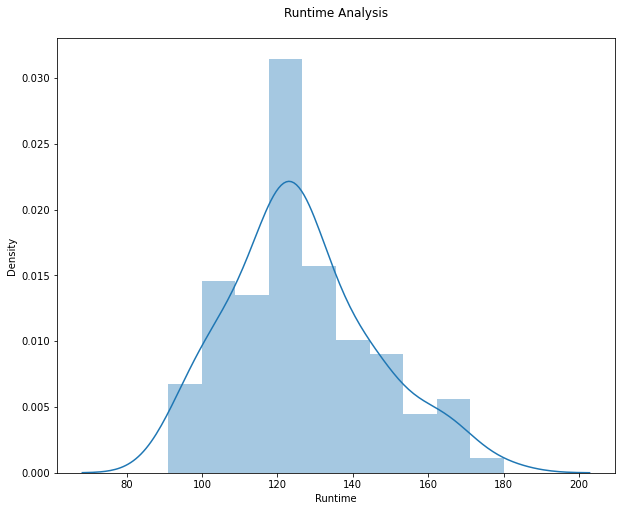

In [101]:
# Runtime histogram/density plot
plt.figure(figsize=[10,8])
plt.title("Runtime Analysis\n")
sns.distplot(movies.Runtime)
plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

**`Checkpoint 3:`** **YES**, Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [102]:
# Write your code here
moviesR = movies[movies["content_rating"]=="R"]
PopularR = moviesR.sort_values("CVotesU18", ascending=False).iloc[0:10,0:]
PopularR

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,Trio_List
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25,"Ryan Reynolds,Ed Skrein,Stefan Kapicic"
36,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.5,7.8,8.1,8.1,R,USA,16.866727,7.85,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau"
35,Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.1,7.8,8.4,8.4,R,USA,62.804648,8.25,"Leonardo DiCaprio,Christoph Waltz,Ato Essandoh"
29,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.5,7.2,8.0,8.2,8.0,R,Australia,3.629485,8.55,"Tom Hardy,Charlize Theron,ZoÃ« Kravitz"
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65,"J.K. Simmons,Melissa Benoist,Chris Mulkey"
31,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.8,7.6,8.1,7.9,R,USA,48.635922,7.80,"Leonardo DiCaprio,Tom Hardy,Lukas Haas"
40,Shutter Island,2010,80.0,127.968405,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,7.4,7.6,7.6,7.8,8.1,R,USA,47.968405,7.20,"Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto"
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00,"Patrick Fugit,Sela Ward,Emily Ratajkowski"
65,The Grand Budapest Hotel,2014,25.0,59.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,7.8,7.9,7.7,8.1,8.0,R,USA,34.073773,8.45,"Bill Murray,Tom Wilkinson,F. Murray Abraham"
72,Birdman or (The Unexpected Virtue of Ignorance),2014,18.0,42.335698,Emma Stone,Naomi Watts,Merritt Wever,15000,6000.0,529.0,...,7.3,7.0,7.1,7.9,7.7,R,USA,24.335698,8.30,"Emma Stone,Naomi Watts,Merritt Wever"


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

**`Checkpoint 4:`** **YES**, the kids are watching `Deadpool` a lot.

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [103]:
# Create the dataframe df_by_genre
df_by_genre = movies.drop(movies.columns[[0,1,2,3,4,5,6,7,8,9,10,14,15,60,61,62,63,64]], axis=1, inplace=False)
df_by_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre_1       100 non-null    object 
 1   genre_2       97 non-null     object 
 2   genre_3       74 non-null     object 
 3   CVotes10      100 non-null    int64  
 4   CVotes09      100 non-null    int64  
 5   CVotes08      100 non-null    int64  
 6   CVotes07      100 non-null    int64  
 7   CVotes06      100 non-null    int64  
 8   CVotes05      100 non-null    int64  
 9   CVotes04      100 non-null    int64  
 10  CVotes03      100 non-null    int64  
 11  CVotes02      100 non-null    int64  
 12  CVotes01      100 non-null    int64  
 13  CVotesMale    100 non-null    int64  
 14  CVotesFemale  100 non-null    int64  
 15  CVotesU18     100 non-null    int64  
 16  CVotesU18M    100 non-null    int64  
 17  CVotesU18F    100 non-null    int64  
 18  CVotes1829    100 non-null    i

In [104]:
# Create a column cnt and initialize it to 1
df_by_genre["cnt"] = 1
df_by_genre.cnt.value_counts()

1    100
Name: cnt, dtype: int64

In [105]:
# Group the movies by individual genres

df_by_g1 = df_by_genre.groupby("genre_1").sum()
df_by_g2 = df_by_genre.groupby("genre_2").sum()
df_by_g3 = df_by_genre.groupby("genre_3").sum()

In [106]:
# Add the grouped data frames and store it in a new data frame
df_add = df_by_g1.add(df_by_g2, fill_value=0).add(df_by_g3, fill_value=0)
df_add.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


In [107]:
# Extract genres with atleast 10 occurences

genre_top10 = df_add.sort_values("cnt",ascending=False)
genre_top10 = genre_top10[genre_top10["cnt"]>=10]
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0


In [108]:
# Take the mean for every column by dividing with cnt 

# CVotes

# CVotes: Number of people who have voted 1-9 / 10 for the movie
genre_top10["CVotes10"] = (genre_top10["CVotes10"] / genre_top10.cnt)
genre_top10["CVotes09"] = (genre_top10["CVotes09"] / genre_top10.cnt)
genre_top10["CVotes08"] = (genre_top10["CVotes08"] / genre_top10.cnt)
genre_top10["CVotes07"] = (genre_top10["CVotes07"] / genre_top10.cnt)
genre_top10["CVotes06"] = (genre_top10["CVotes06"] / genre_top10.cnt)
genre_top10["CVotes05"] = (genre_top10["CVotes05"] / genre_top10.cnt)
genre_top10["CVotes04"] = (genre_top10["CVotes04"] / genre_top10.cnt)
genre_top10["CVotes03"] = (genre_top10["CVotes03"] / genre_top10.cnt)
genre_top10["CVotes02"] = (genre_top10["CVotes02"] / genre_top10.cnt)
genre_top10["CVotes01"] = (genre_top10["CVotes01"] / genre_top10.cnt)

#CVotes: Total number of Votes from the males/females
genre_top10["CVotesMale"] = (genre_top10["CVotesMale"] / genre_top10.cnt)
genre_top10["CVotesFemale"] = (genre_top10["CVotesFemale"] / genre_top10.cnt)

#CVotes: Number of votes from the age group under 18 as well as w.r.t males/females U18
genre_top10["CVotesU18"] = (genre_top10["CVotesU18"] / genre_top10.cnt)
genre_top10["CVotesU18M"] = (genre_top10["CVotesU18M"] / genre_top10.cnt)
genre_top10["CVotesU18F"] = (genre_top10["CVotesU18F"] / genre_top10.cnt)

#CVotes: Number of votes from the age group  18 to 29 as well as w.r.t males/females
genre_top10["CVotes1829"] = (genre_top10["CVotes1829"] / genre_top10.cnt)
genre_top10["CVotes1829M"] = (genre_top10["CVotes1829M"] / genre_top10.cnt)
genre_top10["CVotes1829F"] = (genre_top10["CVotes1829F"] / genre_top10.cnt)

#CVotes: Number of votes from the age group  30 to 44 as well as w.r.t males/females
genre_top10["CVotes3044"] = (genre_top10["CVotes3044"] / genre_top10.cnt)
genre_top10["CVotes3044M"] = (genre_top10["CVotes3044M"] / genre_top10.cnt)
genre_top10["CVotes3044F"] = (genre_top10["CVotes3044F"] / genre_top10.cnt)

#CVotes: Number of votes from the age group above 45 as well as w.r.t males/females
genre_top10["CVotes45A"] = (genre_top10["CVotes45A"] / genre_top10.cnt)
genre_top10["CVotes45AM"] = (genre_top10["CVotes45AM"] / genre_top10.cnt)
genre_top10["CVotes45AF"] = (genre_top10["CVotes45AF"] / genre_top10.cnt)

#CVotes: Number of votes from the top 1000 IMDb voters
genre_top10["CVotes1000"] = (genre_top10["CVotes1000"] / genre_top10.cnt)

#CVotes: Number of votes from the people of US
genre_top10["CVotesUS"] = (genre_top10["CVotesUS"] / genre_top10.cnt)

#CVotes: Number of votes from the non-US people
genre_top10["CVotesnUS"] = (genre_top10["CVotesnUS"] / genre_top10.cnt)


# Votes
#Votes: Average rating given by males/females
genre_top10["VotesM"] = (genre_top10["VotesM"] / genre_top10.cnt)
genre_top10["VotesF"] = (genre_top10["VotesF"] / genre_top10.cnt)

#Votes: Average rating given by the age group under 18 as well as w.r.t males/females
genre_top10["VotesU18"] = (genre_top10["VotesU18"] / genre_top10.cnt)
genre_top10["VotesU18M"] = (genre_top10["VotesU18M"] / genre_top10.cnt)
genre_top10["VotesU18F"] = (genre_top10["VotesU18F"] / genre_top10.cnt)

#Votes: Average rating given by the age group 18 to 29 as well as w.r.t males/females
genre_top10["Votes1829"] = (genre_top10["Votes1829"] / genre_top10.cnt)
genre_top10["Votes1829M"] = (genre_top10["Votes1829M"] / genre_top10.cnt)
genre_top10["Votes1829F"] = (genre_top10["Votes1829F"] / genre_top10.cnt)

#Votes: Average rating given by the age group  30 to 44 as well as w.r.t males/females
genre_top10["Votes3044"] = (genre_top10["Votes3044"] / genre_top10.cnt)
genre_top10["Votes3044M"] = (genre_top10["Votes3044M"] / genre_top10.cnt)
genre_top10["Votes3044F"] = (genre_top10["Votes3044F"] / genre_top10.cnt)

#Votes: Average rating given by the age group above 45 as well as w.r.t males/females
genre_top10["Votes45A"] = (genre_top10["Votes45A"] / genre_top10.cnt)
genre_top10["Votes45AM"] = (genre_top10["Votes45AM"] / genre_top10.cnt)
genre_top10["Votes45AF"] = (genre_top10["Votes45AF"] / genre_top10.cnt)

#Votes: Average rating given by the top 1000 IMDb voters
genre_top10["Votes1000"] = (genre_top10["Votes1000"] / genre_top10.cnt)

#Votes: Average rating by the US people
genre_top10["VotesUS"] = (genre_top10["VotesUS"] / genre_top10.cnt)

#Votes: Average rating by the non US people
genre_top10["VotesnUS"] = (genre_top10["VotesnUS"] / genre_top10.cnt)

In [109]:
# Converting CVotes to int type

genre_top10["CVotes10"] = genre_top10["CVotes10"].astype(int)
genre_top10["CVotes09"] = genre_top10["CVotes09"].astype(int)
genre_top10["CVotes08"] = genre_top10["CVotes08"].astype(int)
genre_top10["CVotes07"] = genre_top10["CVotes07"].astype(int)
genre_top10["CVotes06"] = genre_top10["CVotes06"].astype(int)
genre_top10["CVotes05"] = genre_top10["CVotes05"].astype(int)
genre_top10["CVotes04"] = genre_top10["CVotes04"].astype(int)
genre_top10["CVotes03"] = genre_top10["CVotes03"].astype(int)
genre_top10["CVotes02"] = genre_top10["CVotes02"].astype(int)
genre_top10["CVotes01"] = genre_top10["CVotes01"].astype(int)
genre_top10["CVotesMale"] = genre_top10["CVotesMale"].astype(int)
genre_top10["CVotesFemale"] = genre_top10["CVotesFemale"].astype(int)
genre_top10["CVotesU18"] = genre_top10["CVotesU18"].astype(int)
genre_top10["CVotesU18M"] = genre_top10["CVotesU18M"].astype(int)
genre_top10["CVotesU18F"] = genre_top10["CVotesU18F"].astype(int)
genre_top10["CVotes1829"] = genre_top10["CVotes1829"].astype(int)
genre_top10["CVotes1829M"] = genre_top10["CVotes1829M"].astype(int)
genre_top10["CVotes1829F"] = genre_top10["CVotes1829F"].astype(int)
genre_top10["CVotes3044"] = genre_top10["CVotes3044"].astype(int)
genre_top10["CVotes3044M"] = genre_top10["CVotes3044M"].astype(int)
genre_top10["CVotes3044F"] = genre_top10["CVotes3044F"].astype(int)
genre_top10["CVotes45A"] = genre_top10["CVotes45A"].astype(int)
genre_top10["CVotes45AM"] = genre_top10["CVotes45AM"].astype(int)
genre_top10["CVotes45AF"] = genre_top10["CVotes45AF"].astype(int)
genre_top10["CVotes1000"] = genre_top10["CVotes1000"].astype(int)
genre_top10["CVotesUS"] = genre_top10["CVotesUS"].astype(int)
genre_top10["CVotesnUS"] = genre_top10["CVotesnUS"].astype(int)

# Rounding off the columns of Votes to two decimals

genre_top10["VotesM"] = genre_top10["VotesM"].round(2)
genre_top10["VotesF"] = genre_top10["VotesF"].round(2)
genre_top10["VotesU18"] = genre_top10["VotesU18"].round(2)
genre_top10["VotesU18M"] = genre_top10["VotesU18M"].round(2)
genre_top10["VotesU18F"] = genre_top10["VotesU18F"].round(2)
genre_top10["Votes1829"] = genre_top10["Votes1829"].round(2)
genre_top10["Votes1829M"] = genre_top10["Votes1829M"].round(2)
genre_top10["Votes1829F"] = genre_top10["Votes1829F"].round(2)
genre_top10["Votes3044"] = genre_top10["Votes3044"].round(2)
genre_top10["Votes3044M"] = genre_top10["Votes3044M"].round(2)
genre_top10["Votes3044F"] = genre_top10["Votes3044F"].round(2)
genre_top10["Votes45A"] = genre_top10["Votes45A"].round(2)
genre_top10["Votes45AM"] = genre_top10["Votes45AM"].round(2)
genre_top10["Votes45AF"] = genre_top10["Votes45AF"].round(2)
genre_top10["Votes1000"] = genre_top10["Votes1000"].round(2)
genre_top10["VotesUS"] = genre_top10["VotesUS"].round(2)
genre_top10["VotesnUS"] = genre_top10["VotesnUS"].round(2)

In [110]:
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

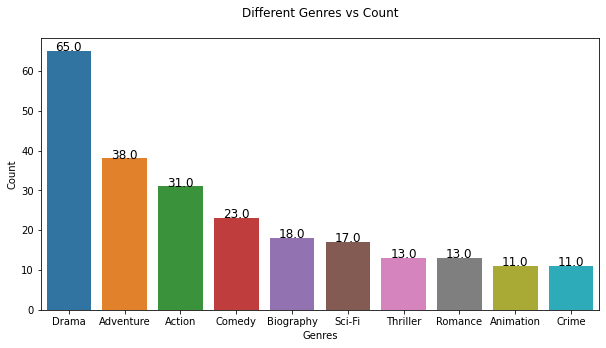

In [119]:
# Countplot for genres

plt.figure(figsize=[10,5])
plt.title("Different Genres vs Count\n")
sns.barplot(data = genre_top10, x=genre_top10.index, y="cnt", orient="v")
plt.xlabel("Genres")
plt.ylabel("Count")

label = genre_top10["cnt"]
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],horizontalalignment='center',rotation = 360, color = "black", fontsize=12)

plt.show()

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

**`Checkpoint 5:`** **YES**, the bar for `Drama` is the tallest.

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

In [125]:
# 1st set of heat maps for CVotes-related columns

res = genre_top10[["CVotesU18M","CVotes1829M","CVotes3044M","CVotes45AM"]]
res1 = genre_top10[["CVotesU18F","CVotes1829F","CVotes3044F","CVotes45AF"]]

print("CVotes w.r.t - Males\n\n",res)
print("\n-------------------------------------------------------------\nCVotes w.r.t - Females\n\n",res1)

CVotes w.r.t - Males

            CVotesU18M  CVotes1829M  CVotes3044M  CVotes45AM
Drama             915       105203        87644       17422
Adventure        1900       146808       115795       21910
Action           1916       164703       132836       24092
Comedy           1178       109016        86346       15979
Biography         886       114043        92158       18039
Sci-Fi           2382       197123       160141       30141
Thriller         1327       156573       129421       24421
Romance           535        79024        62253       12054
Animation        1486       103695        75824       12966
Crime             932       122690       102671       18799

-------------------------------------------------------------
CVotes w.r.t - Females

            CVotesU18F  CVotes1829F  CVotes3044F  CVotes45AF
Drama             317        29896        16964        3806
Adventure         601        39896        20750        4267
Action            525        36996        20627  

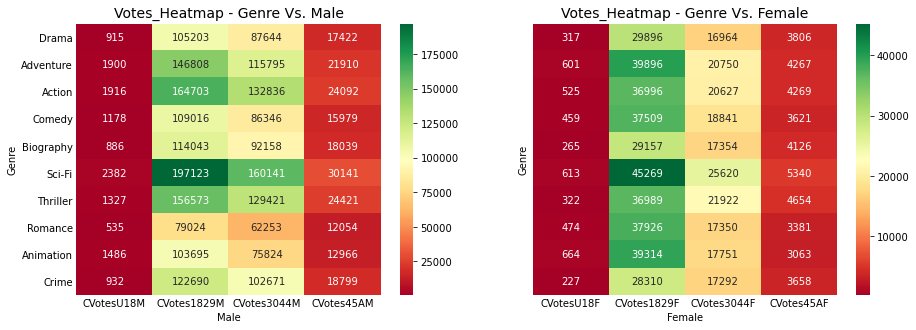

In [126]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title("Votes_Heatmap - Genre Vs. Male", fontsize=14)
ax = sns.heatmap(res, annot=True, cmap="RdYlGn",fmt='d')
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("Male")
plt.ylabel("Genre")
plt.subplot(1,2,2)
plt.title("Votes_Heatmap - Genre Vs. Female", fontsize=14)
ax = sns.heatmap(res1, annot=True, cmap="RdYlGn",fmt='d',yticklabels=False)
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("Female")
plt.ylabel("Genre")
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:
- Inference 2:
- Inference 3:

**Inference 1:**
- Drama Genre have the highest vote counts from the bar graph we can see but it is popular only in age group 18-29 and more in Females.

**Inference 2:**
- Though Crime got least vote count as we can see in bar graph still it is equal and more popular then Drama genre in age group 18-29 irrespective of gender.

**Inference 3:**
- Adventure(2nd highest) and Action(3rd highest) in total vote counts as we can see in bar graph, and it is also popular in age group 18-29 but in males more popular as compare to females

In [127]:
# 2nd set of heat maps for Votes-related columns

res1v = genre_top10[["VotesU18M","Votes1829M","Votes3044M","Votes45AM"]]
res2v = genre_top10[["VotesU18F","Votes1829F","Votes3044F","Votes45AF"]]

print("Votes w.r.t - Males\n\n",res1v)
print("\n-------------------------------------------------------------\nVotes w.r.t - Females\n\n",res2v)

Votes w.r.t - Males

            VotesU18M  Votes1829M  Votes3044M  Votes45AM
Drama           8.19        8.00        7.71       7.62
Adventure       8.14        8.01        7.73       7.64
Action          8.15        7.98        7.73       7.63
Comedy          8.13        7.99        7.71       7.60
Biography       8.14        7.98        7.72       7.66
Sci-Fi          8.29        8.11        7.85       7.69
Thriller        8.21        8.02        7.75       7.64
Romance         8.06        7.92        7.61       7.50
Animation       7.97        7.99        7.72       7.65
Crime           8.26        8.02        7.76       7.62

-------------------------------------------------------------
Votes w.r.t - Females

            VotesU18F  Votes1829F  Votes3044F  Votes45AF
Drama           8.15        7.92        7.72       7.74
Adventure       8.29        8.09        7.87       7.84
Action          8.28        8.00        7.80       7.75
Comedy          8.13        7.95        7.75       

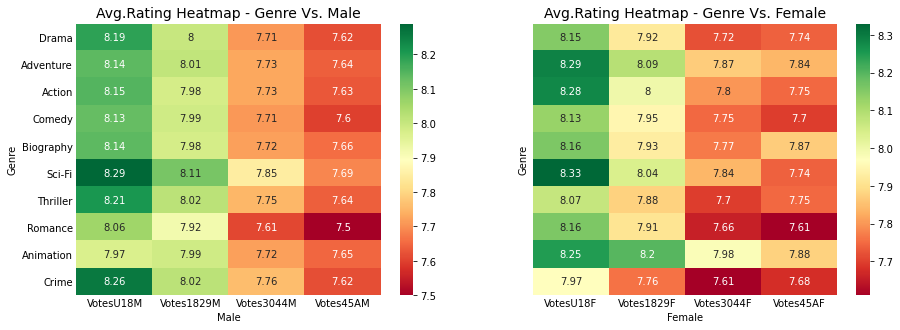

In [128]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title("Avg.Rating Heatmap - Genre Vs. Male", fontsize=14)
ax = sns.heatmap(res1v, annot=True, cmap="RdYlGn",fmt ='.3g')
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("Male")
plt.ylabel("Genre")
plt.subplot(1,2,2)
plt.title("Avg.Rating Heatmap - Genre Vs. Female", fontsize=14)
ax = sns.heatmap(res2v, annot=True, cmap="RdYlGn",fmt ='.3g',yticklabels=False)
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("Female")
plt.ylabel("Genre")
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:
- Inference 2:
- Inference 3:

**Inference 1:**
- Adventure appears to be the highest rated genre in the age group of U18 for females, after Sci-Fi. Where as, Crime and Thriller to be the highest rated genre in the age group of U18 for males, after Sci-Fi

**Inference 2:**
- Animation though vote count as we can see in bar graph is very low but popular in both genders of age group - (U18 and 1829). Also, females a bit higher.
- Action appears to be 3rd highest in vote count as we can see in bar graph and popular in both age group - (U18 and 1829). Also, Females a bit higher

**Inference 3:**
- In contrast to age group - (3044 and 45A), Females shows a lot of variation in rating whereas the male ratings are consistent and more over somewhat equal in all type of genres

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [134]:
# Creating IFUS column

movies["IFUS"] = "non-USA"
movies.IFUS = movies[movies["Country"]=="USA"].IFUS.replace(to_replace=["non-USA"],value=["USA"])
movies.IFUS.fillna("non-USA", inplace=True)
print("Sum of all (USA & Non-USA Movies) Gross Values\n")
print(movies.groupby(["IFUS"])["Gross"].sum())
print("\n-------------------------------------------------------------\n")
print("Null Values in Column \"IFUS\":", movies.IFUS.isnull().sum())
print("\n-------------------------------------------------------------\n")
print("Sum of all Gross Values w.r.t \"Countries\"\n")
print(movies.groupby(["Country","IFUS"])["Gross"].sum())

Sum of all (USA & Non-USA Movies) Gross Values

IFUS
USA        12826.402550
non-USA     1860.384174
Name: Gross, dtype: float64

-------------------------------------------------------------

Null Values in Column "IFUS": 0

-------------------------------------------------------------

Sum of all Gross Values w.r.t "Countries"

Country    IFUS   
Australia  non-USA      463.124587
Canada     non-USA        0.223838
France     non-USA       46.231624
Spain      non-USA       56.816662
UK         non-USA     1293.987463
USA        USA        12826.402550
Name: Gross, dtype: float64


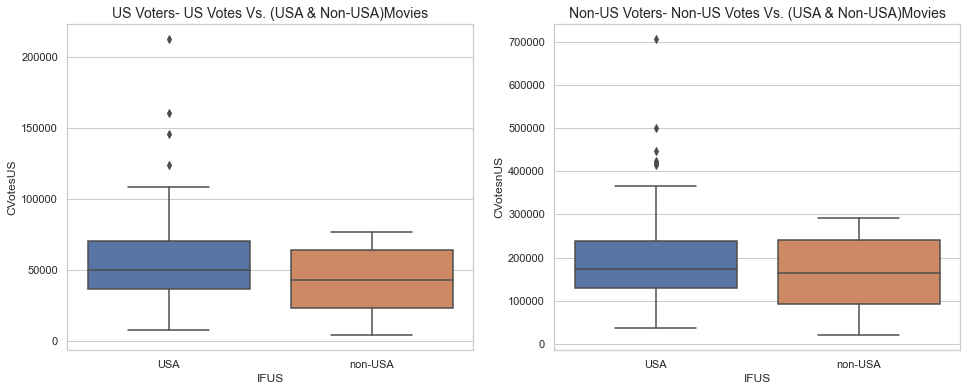

In [136]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
# Box plot - 2: CVotesnUS(y) vs IFUS(x)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.title("US Voters- US Votes Vs. (USA & Non-USA)Movies", fontsize=14)
sns.set_theme(style="whitegrid")
sns.boxplot(data=movies, x="IFUS",y="CVotesUS")
plt.subplot(1,2,2)
plt.title("Non-US Voters- Non-US Votes Vs. (USA & Non-USA)Movies", fontsize=14)
sns.set_theme(style="whitegrid")
sns.boxplot(data=movies, x="IFUS",y="CVotesnUS")
plt.show()

In [137]:
print(movies.CVotesUS.describe(),"\n\n", movies.CVotesUS.quantile([0.5,0.7,0.9,0.95,0.99]),"\n\n", movies.CVotesnUS.describe(),"\n\n",movies.CVotesnUS.quantile([0.5,0.7,0.9,0.95,0.99]))

count       100.000000
mean      54096.740000
std       32115.288162
min        3678.000000
25%       33328.750000
50%       48560.000000
75%       70167.000000
max      212524.000000
Name: CVotesUS, dtype: float64 

 0.50     48560.00
0.70     63156.30
0.90     86651.00
0.95    105627.70
0.99    161052.91
Name: CVotesUS, dtype: float64 

 count       100.000000
mean     188245.680000
std      106902.256347
min       19009.000000
25%      121863.500000
50%      169132.000000
75%      239628.250000
max      707266.000000
Name: CVotesnUS, dtype: float64 

 0.50    169132.00
0.70    225878.00
0.90    293086.50
0.95    415501.25
0.99    503742.79
Name: CVotesnUS, dtype: float64


In [138]:
movies[movies.CVotesUS>165000] #greater than 99 percentile

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,Trio_List,IFUS
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,8.1,"Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt",USA


In [139]:
movies[movies.CVotesnUS>510000] #greater than 99 percentile

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,Trio_List,IFUS
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,8.1,"Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt",USA


**`Inferences:`** Write your two inferences/observations below:
- Inference 1:
- Inference 2:

**Inference 1:**
- No matter vote is coming from US Voters or Non-US Voters - Movie:Inception is on top in both cases
- Number of votes given by Non-US Voters is much higer as compared to US Voters

**Inference 2:**

**US Voters**
- Median of US Movies votes is greater than that of Non-US Movies.
- The overall range of the votes is greater for the US Movies (as shown by the distances between the ends of the two whiskers for each boxplot).
- But IQR of Non-US Movies in terms of US Voters is greater than the IQR of US Movies in terms of US Voters
- There is potential outliers: Movie Inception with TRIO LIST of - (Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt) which is important as this is the same trio we have recomended as the best trio on basis of FB Likes

**Non-US Voters**
- Median of US Movies and  Non-US Movies in terms of Non-US voters is quite similar.
- The overall range of the votes is greater for the US Movies (as shown by the distances between the ends of the two whiskers for each boxplot).
- But IQR of Non-US Movies in terms of Non- US Voters is greater than the IQR of US Movies in terms of Non-US Voters.
- There is potential outliers: Movie Inception with TRIO LIST of - (Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt) which is important as this is the same trio we have recomended as the best trio on basis of FB Likes




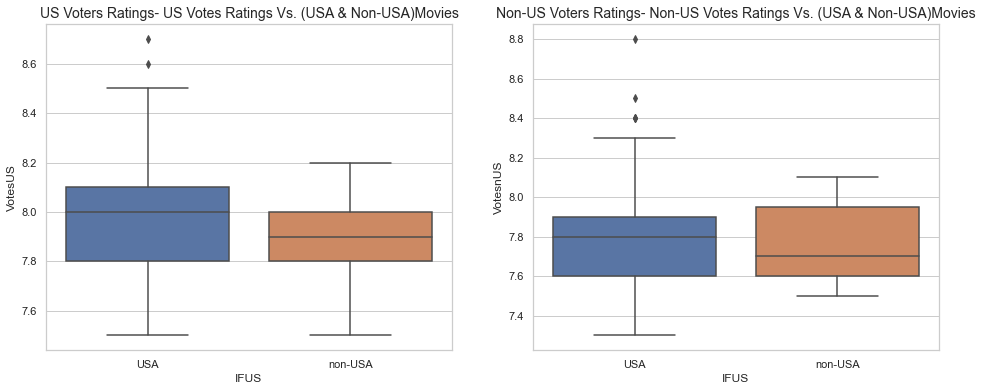

In [147]:
# Box plot - 3: VotesUS(y) vs IFUS(x)
# Box plot - 4: VotesnUS(y) vs IFUS(x)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.title("US Voters Ratings- US Votes Ratings Vs. (USA & Non-USA)Movies", fontsize=14)
sns.set_theme(style="whitegrid")
sns.boxplot(data=movies, x="IFUS",y="VotesUS")
plt.subplot(1,2,2)
plt.title("Non-US Voters Ratings- Non-US Votes Ratings Vs. (USA & Non-USA)Movies", fontsize=14)
sns.set_theme(style="whitegrid")
sns.boxplot(data=movies, x="IFUS",y="VotesnUS")
plt.show()

In [148]:
print(movies.VotesUS.describe(),"\n\n", movies.VotesUS.quantile([0.5,0.7,0.9,0.95,0.99]),"\n\n", movies.VotesnUS.describe(),"\n\n",movies.VotesnUS.quantile([0.5,0.7,0.9,0.95,0.99]))

count    100.000000
mean       7.958000
std        0.232327
min        7.500000
25%        7.800000
50%        7.950000
75%        8.100000
max        8.700000
Name: VotesUS, dtype: float64 

 0.50    7.950
0.70    8.030
0.90    8.300
0.95    8.400
0.99    8.601
Name: VotesUS, dtype: float64 

 count    100.000000
mean       7.793000
std        0.264099
min        7.300000
25%        7.600000
50%        7.750000
75%        7.925000
max        8.800000
Name: VotesnUS, dtype: float64 

 0.50    7.750
0.70    7.900
0.90    8.100
0.95    8.305
0.99    8.503
Name: VotesnUS, dtype: float64


In [149]:
movies[movies.VotesUS>=8.65] #greater than 99 percentile

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,Trio_List,IFUS
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,8.1,"Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt",USA


In [150]:
movies[movies.VotesnUS>=8.6] #greater than 99 percentile

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,Trio_List,IFUS
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,8.1,"Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt",USA


**`Inferences:`** Write your two inferences/observations below:
- Inference 1:
- Inference 2:

**Inference 1:**
- No matter votes average rating is coming from US Voters or Non-US Voters - Movie:Inception is on top in both cases

**Inference 2:**

**US Voters**
- Median of US Movies average rating is greater than that of Non-US Movies.
- The overall range of the ratings is greater for the US Movies (as shown by the distances between the ends of the two whiskers for each boxplot).
- Even the IQR of US Movies in terms of US Voters ratings is greater than the IQR of Non-US Movies in terms of US Voters ratings.
- There is potential outliers: Movie Inception with TRIO LIST of - (Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt) which is important as this is the same trio we have recomended as the best trio on basis of FB Likes

**Non-US Voters**
- Median of US Movies average rating is greater than that of Non-US Movies.
- The overall range of the ratings is greater for the US Movies (as shown by the distances between the ends of the two whiskers for each boxplot).
- But IQR of Non-US Movies in terms of Non- US Voters ratings is greater than the IQR of US Movies in terms of Non-US Voters ratings.
- There is potential outliers: Movie Inception with TRIO LIST of - (Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt) which is important as this is the same trio we have recomended as the best trio on basis of FB Likes




-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [151]:
# Sorting by CVotes1000

genre_top10.sort_values("CVotes1000", ascending=False)

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0


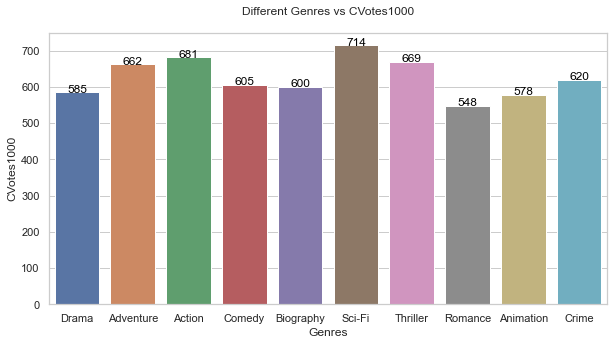

In [152]:
# Bar plot
plt.figure(figsize=[10,5])
plt.title("Different Genres vs CVotes1000\n")
sns.barplot(data = genre_top10, x=genre_top10.index, y="CVotes1000", orient="v")
plt.xlabel("Genres")

label = genre_top10["CVotes1000"]
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],horizontalalignment='center',rotation = 360, color = "black", fontsize=12)

plt.show()

**`Inferences:`** Write your inferences/observations here.

**`Inferences:`** 
- Sci-Fi Genre seems to be most popular among the top 1000 voters.
- Drama Genre total vote counts as we seen at previous bar graph is very high but it is 3rd most unpopular genre after Romance among the top 1000 voters.
- Action Genre 2nd most popular among the top 1000 voters after Sci-Fi.

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

**`Checkpoint 6:`** **YES**, The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.